In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def gaussian_mixture(x, mu, sigma, mu0, sigma0):
    first = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma * sigma))
    second = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x + mu) ** 2 / (2 * sigma * sigma))
    center = 1 / (sigma0 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu0) ** 2 / (2 * sigma0 * sigma0))
    return 1 / 7 * first + 5 / 7 * center + 1 / 7 * second

In [55]:
def exponential_mixture(x, lambda_):
    result = np.zeros(x.shape)
    result[x >= 0] = 1 / 2 * lambda_ * np.exp(-lambda_ * x[x >= 0])
    result[x < 0] = 1 / 2 * lambda_ * np.exp(lambda_ * x[x < 0])
    return result

In [71]:
def get_params_for_distribution(distr_type, variance):
    modifier = 10
    if distr_type == 'gaussian_mixture':
        params = [10, 1, 0, 2]
        params[0] += variance / modifier
        params[3] += 0.5 * variance / modifier
        return params
    elif distr_type == 'exponential_mixture':
        params = 1 / (variance / modifier + 1)
        return params
    else:
        raise NotImplemented
        

def distribution_plot(x, distr_type, variance):
    params = get_params_for_distribution(distr_type, variance)
    if distr_type == 'gaussian_mixture':
        return gaussian_mixture(x, *params)
    elif distr_type == 'exponential_mixture':
        return exponential_mixture(x, params)
    else:
        raise NotImplemented

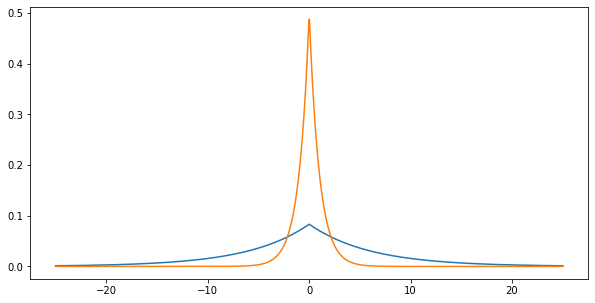

In [72]:
plt.figure(figsize=(10, 5))
x = np.linspace(-25, 25, 1000)
plt.plot(x, distribution_plot(x, 'exponential_mixture', 50))
plt.plot(x, distribution_plot(x, 'exponential_mixture', 0))
#plt.plot(x, distribution_plot(x, 'gaussian_mixture', 20))

In [73]:
def sample_from_gaussian_mixture(generator, params):
    mixture = generator.uniform(0, 1)
    if mixture < 1 / 7:
        return generator.normal(-params[0], params[1])
    elif mixture > 6 / 7:
        return generator.normal(params[0], params[1])
    return generator.normal(params[2], params[3])

In [82]:
params = get_params_for_distribution("gaussian_mixture", 0)
result = []
generator = np.random.default_rng(None)
for j in range(100000):
    result.append(sample_from_gaussian_mixture(generator, params))

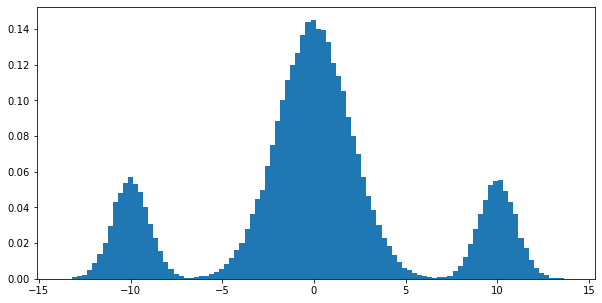

In [83]:
plt.figure(figsize=(10, 5))
plt.hist(result, bins=100, density=True)
plt.show()